# Load a pretrained model
Notice that there are 8 layers (CONV + POOL)

In [1]:
import tensorflow as tf
model = tf.keras.models.load_model('cat_vs_dog_2.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

# Load an image and create an image tensor

load_img(path, grayscale=False, color_mode="rgb", target_size=None, interpolation="nearest"): Loads an image in PIL (Python Imaging Library) format

img_to_array(img, data_format=None, dtype=None): Converts a PIL Image instance to a Numpy array.

expand_dims(a, axis): Expand the shape of an array. Insert a new axis that will appear at the axis position in the expanded array shape.


In [2]:
import numpy as np

load_img = 'cat.0000.jpg'

img = tf.keras.preprocessing.image.load_img(load_img, target_size = (150, 150))
img_tensor = tf.keras.preprocessing.image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis = 0)
img_tensor /= 255.

# Use image tensor as input and extract outputs of the 8 layers

In [3]:
inputs = model.input
layer_outputs = [layer.output for layer in model.layers[: 8]]
activation_model = tf.keras.Model(inputs = inputs, outputs = layer_outputs)
activations = activation_model.predict(img_tensor)

# Let's check the 1st channel of first layer
In this layer most of the information are preserved. Primarily the edges are being detected

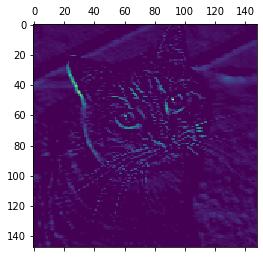

In [4]:
first_layer_activation = activations[0]
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 1], cmap = 'viridis')

# What about the 4th channel of first layer
As we go deeper in channel, the activations become abstract. 

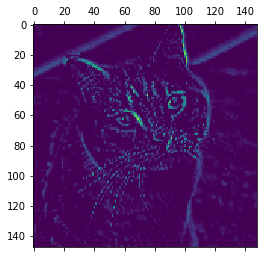

In [5]:
first_layer_activation = activations[0]
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 8], cmap = 'viridis')

# Now check the 52nd channel of 6th layer
With depth increasing the sparsity of the activations also increases. In the first layer, all filters are activated by the input image; but in the higher layers, more filters are blank. This means the pattern encoded by the filter isn't found in the input image

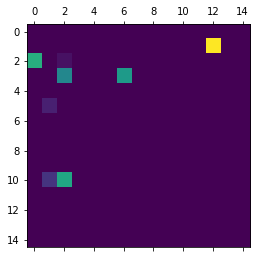

In [6]:
sixth_layer_activation = activations[6]
import matplotlib.pyplot as plt
plt.matshow(sixth_layer_activation[0, :, :, 52], cmap = 'viridis')